In [1]:
from scipy import stats
import statistics as stat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', index_col = "Id")
test = pd.read_csv('test.csv', index_col = 'Id')

X_train = train.drop("SalePrice", axis=1)
y_train = train["SalePrice"]
X = pd.concat([X_train, test])

In [3]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## Data Exploration

In [3]:
# separate columns into numerical and categorical

numerical_cols = list(X_train.select_dtypes(exclude='object').columns)

print(numerical_cols)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [4]:
categorical_cols = list(X_train.select_dtypes(include='object').columns)

print(categorical_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [7]:
#check to see if there are any duplicate rows

X.duplicated().value_counts()

False    2917
True        2
Name: count, dtype: int64

In [8]:
# check to see if there's anything abnormal with target class
y_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Skewness/Kurtosis

C:\Users\Matt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

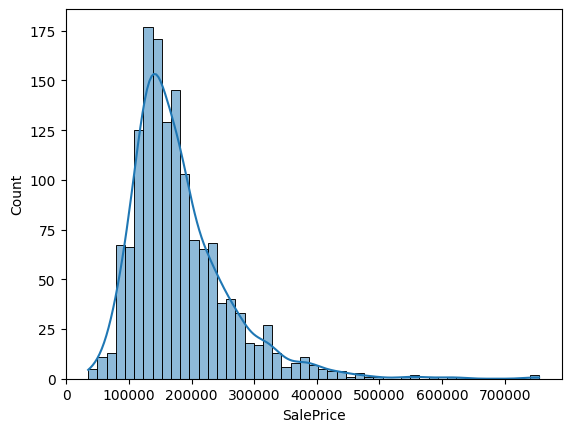

In [9]:
sns.histplot(train["SalePrice"], kde=True)

In [10]:
# get the most correllated columns
num_for_corr = numerical_cols.append('SalePrice')
top_corr = train.corr(numeric_only=True).SalePrice.sort_values(ascending=False)
top_corr.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

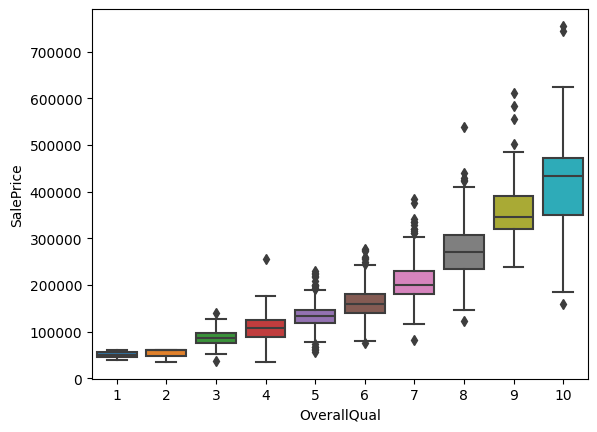

In [11]:
sns.boxplot(x="OverallQual", y=y_train, data=X_train)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

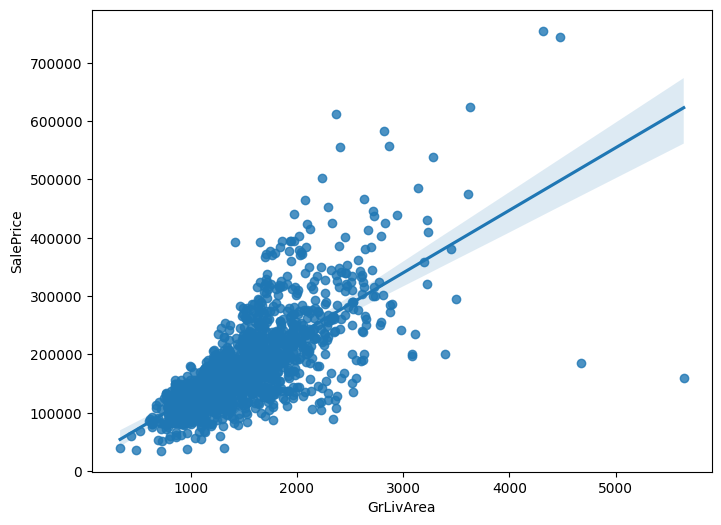

In [12]:
plt.figure(figsize=(8,6))

sns.regplot(x=train['GrLivArea'], y=train['SalePrice'])

### Remove Outliers

Regression models are sensitive to outliers, it makes sense to remove the two outliers with a very large living area but comparatively low sale price.

In [5]:
outlier_index = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index
X.drop(outlier_index, inplace=True)
y_train.drop(outlier_index, inplace=True)

In [14]:
train["LotFrontage"].corr(train["SalePrice"])

0.35179909657067804

In [15]:
## i want to take the list of categorical values and put them into a series so i can order them by significance
## should be able to store information in dictionary

## this function should put each categorical column into a format that we can easily see the t-test and p-test values of

categorical_dict = {}

for col in categorical_cols:
    # get the unique value from the col in question
    groups = X_train[col].unique()
    grouped_values = []
    
    # this loop will create different lists of sale prices for each column value
    for group in groups:
        grouped_values.append(train[train[col] == group]["SalePrice"])
    
    f, p = stats.f_oneway(*grouped_values)
    
    print(f"{col} f statistic = {f}")
    print(f"{col} p-value = {p}")
    print("\n")

MSZoning f statistic = 43.84028167245718
MSZoning p-value = 8.817633866272648e-35


Street f statistic = 2.4592895583691994
Street p-value = 0.11704860406782483


Alley f statistic = nan
Alley p-value = nan


LotShape f statistic = 40.13285166226295
LotShape p-value = 6.447523852011766e-25


LandContour f statistic = 12.850188333283924
LandContour p-value = 2.7422167521379096e-08


Utilities f statistic = 0.29880407484898486
Utilities p-value = 0.584716773968938


LotConfig f statistic = 7.809954123467792
LotConfig p-value = 3.163167473604189e-06


LandSlope f statistic = 1.9588170374149438
LandSlope p-value = 0.1413963584114019


Neighborhood f statistic = 71.78486512058272
Neighborhood p-value = 1.558600282771154e-225


Condition1 f statistic = 6.118017137125925
Condition1 p-value = 8.904549416138854e-08


Condition2 f statistic = 2.0738986215227877
Condition2 p-value = 0.043425658360948464


BldgType f statistic = 13.011077169620851
BldgType p-value = 2.0567364604967015e-10


HouseS

C:\Users\Matt\AppData\Local\Temp\ipykernel_84116\2027212642.py:17: DegenerateDataWarning: at least one input has length 0
  f, p = stats.f_oneway(*grouped_values)


# potentially significant categorical columns

'''
Neighborhood - 225
ExterQual - 204
KitchenQual - 192
Foundation - 91
HeatingQC - 67
SaleCondition - 44
Exterior1st - 43
Exterior2nd - 43
SaleType - 42
10. MSZoning - 35
LotShape - 25
HouseStyle - 25
CentralAir - 22
PavedDrive - 18
RoofStyle - 17
BldgType - 10
LandContour - 8
Condition1 - 8
RoofMatl - 8
LotConfig - 6
Heating - .0007
'''

In [17]:
## it would make it much easier to analyze information if I could sort data before displaying it
## box and whisker plot takes order as a list
## this function sorts the given column by median from highest to lowest


def sort_cat(feature):
    feat_order = train.groupby([feature]).median(numeric_only=True).SalePrice.sort_values(ascending=False).index

    sns.boxplot(x=feature, y='SalePrice', data=train, order=feat_order, palette='viridis')

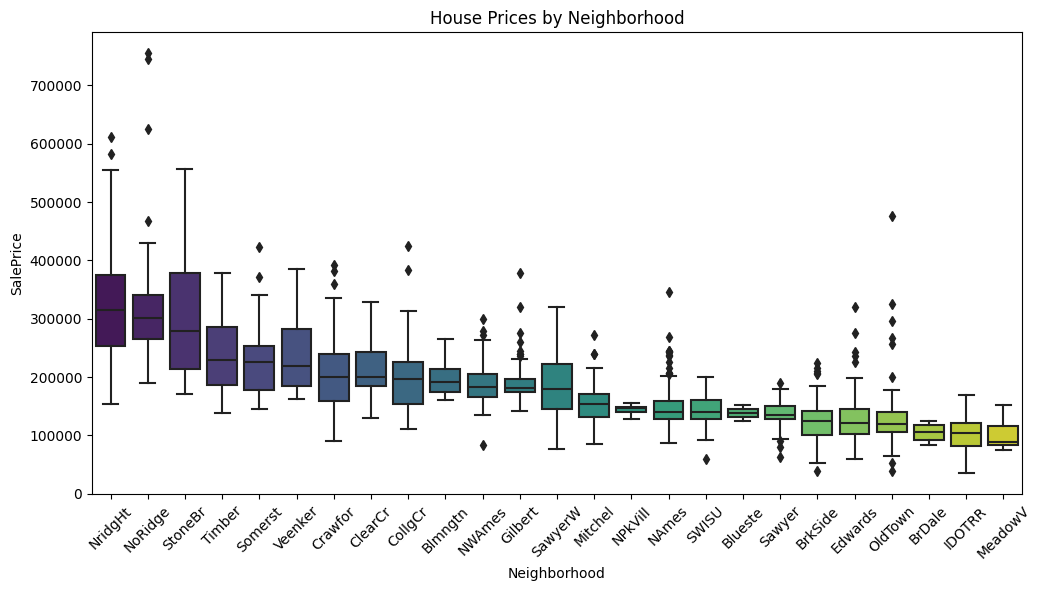

In [18]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=45)
sort_cat("Neighborhood")
title = plt.title("House Prices by Neighborhood")

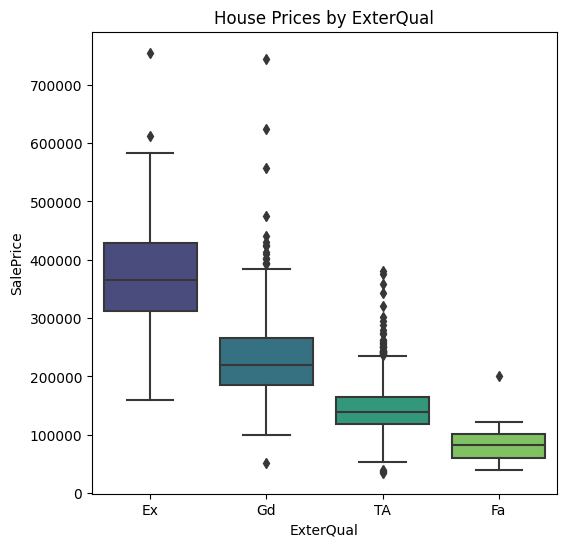

In [19]:
plt.figure(figsize = (6,6))
sort_cat("ExterQual")
title = plt.title("House Prices by ExterQual")

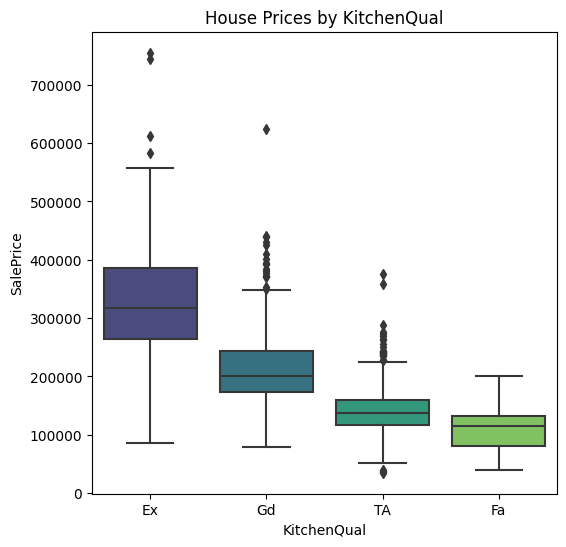

In [20]:
plt.figure(figsize = (6,6))
sort_cat("KitchenQual")
title = plt.title("House Prices by KitchenQual")

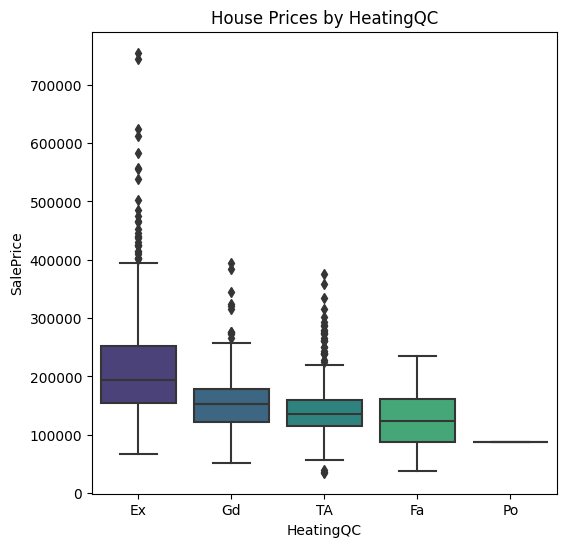

In [21]:
plt.figure(figsize = (6,6))
sort_cat("HeatingQC")
title = plt.title("House Prices by HeatingQC")

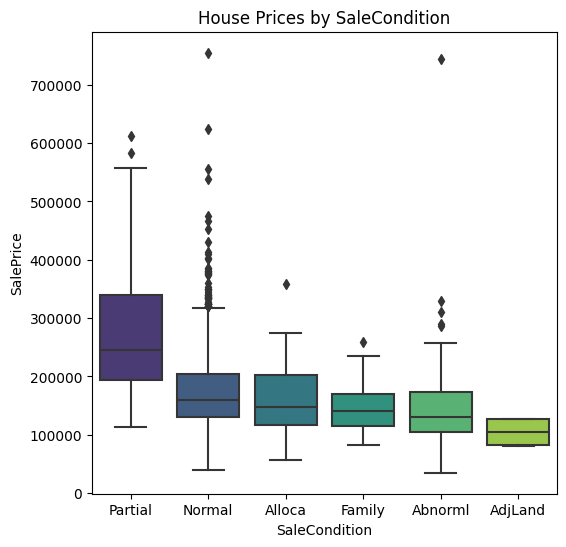

In [22]:
plt.figure(figsize = (6,6))
sort_cat("SaleCondition")
title = plt.title("House Prices by SaleCondition")

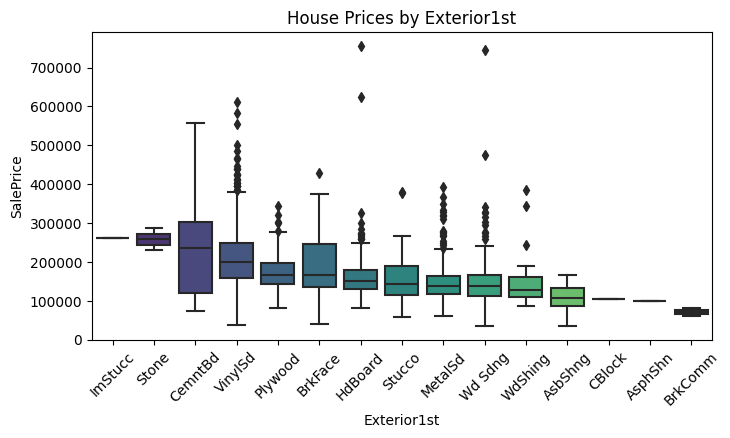

In [23]:
plt.figure(figsize = (8,4))
plt.xticks(rotation=45)
sort_cat("Exterior1st")
title = plt.title("House Prices by Exterior1st")

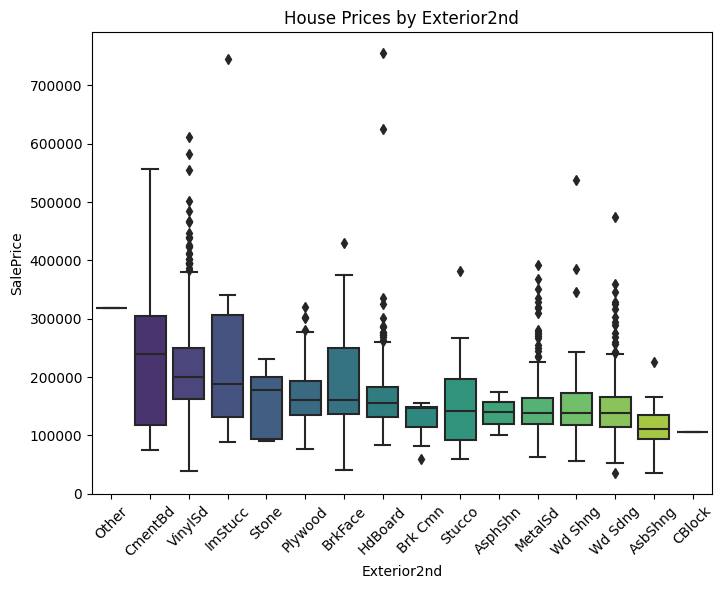

In [24]:
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sort_cat("Exterior2nd")
title = plt.title("House Prices by Exterior2nd")

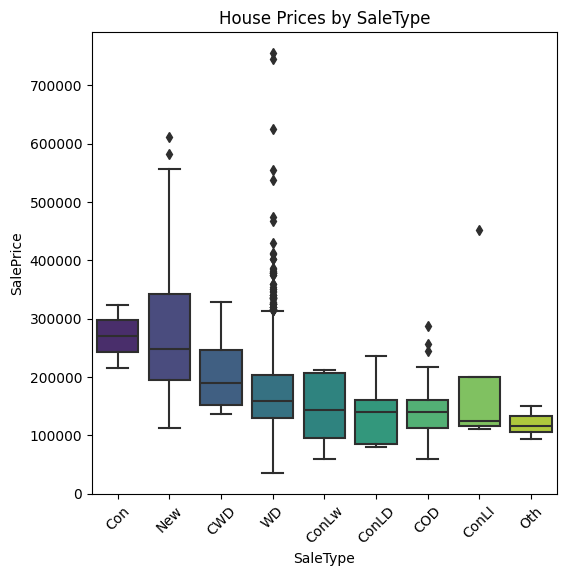

In [25]:
plt.figure(figsize = (6,6))
plt.xticks(rotation=45)
sort_cat("SaleType")
title = plt.title("House Prices by SaleType")

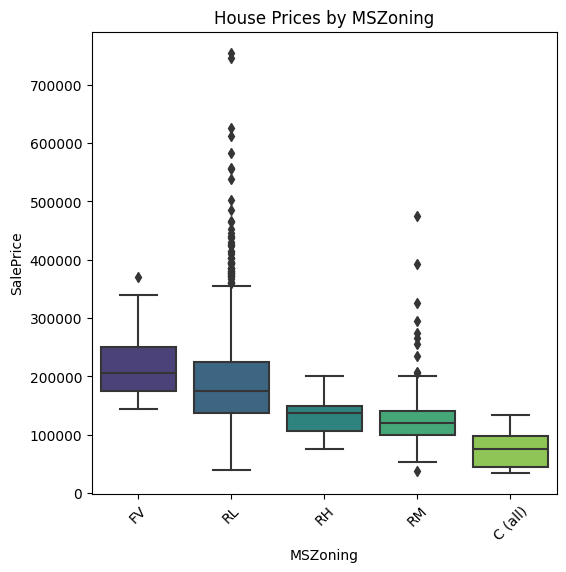

In [26]:
plt.figure(figsize = (6,6))
plt.xticks(rotation=45)
sort_cat("MSZoning")
title = plt.title("House Prices by MSZoning")

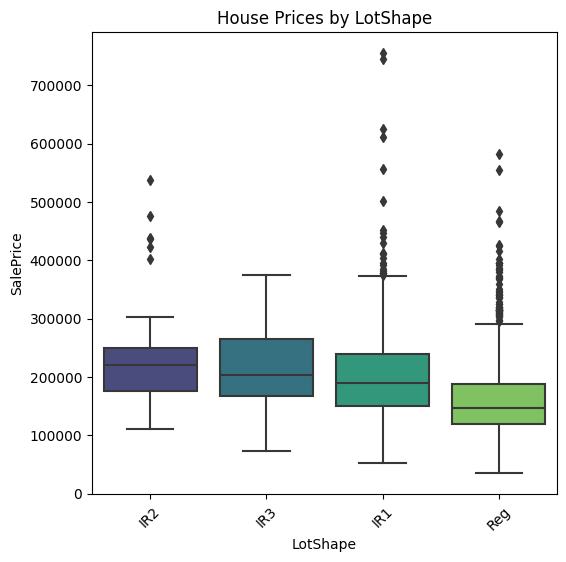

In [30]:
plt.figure(figsize = (6,6))
plt.xticks(rotation=45)
sort_cat("LotShape")
title = plt.title("House Prices by LotShape")

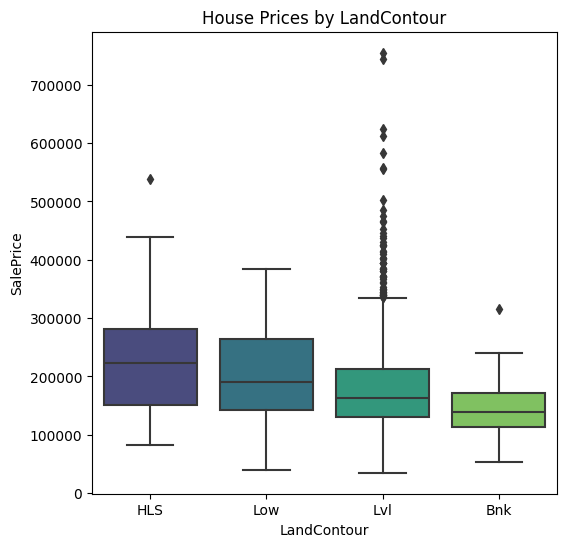

In [28]:
plt.figure(figsize = (6,6))
sort_cat("LandContour")
title = plt.title("House Prices by LandContour")

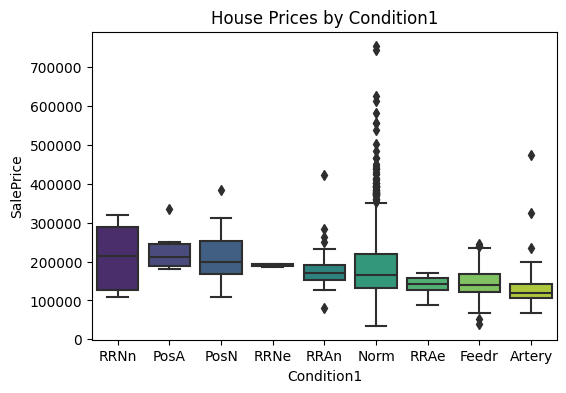

In [31]:
plt.figure(figsize = (6,4))
sort_cat("Condition1")
title = plt.title("House Prices by Condition1")


## Would not have expected being close to a railroad to increase house value over normal. 

## I'd be interested to see how this correllates to year built
## my guess would be that the value of houses near railroads has gone down over time


In [32]:
train[train["Condition1"]=="RRNn"][['SalePrice', "YearBuilt"]]

,SalePrice,YearBuilt
Id,,
53,110000,1963
532,128000,1920
933,320000,2006
942,214000,1999
1210,290000,2006


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

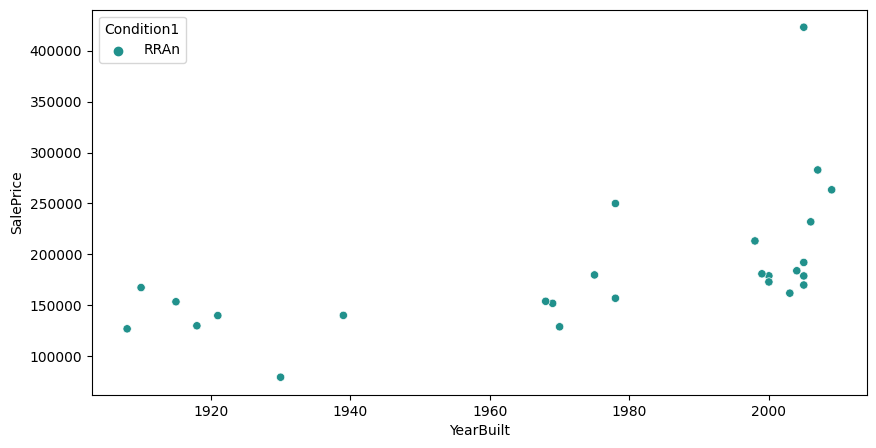

In [33]:
plt.figure(figsize=(10, 5))
test_data = train[train["Condition1"]=="RRAn"]
sns.scatterplot(data=test_data, x="YearBuilt", y='SalePrice', hue='Condition1', palette='viridis')

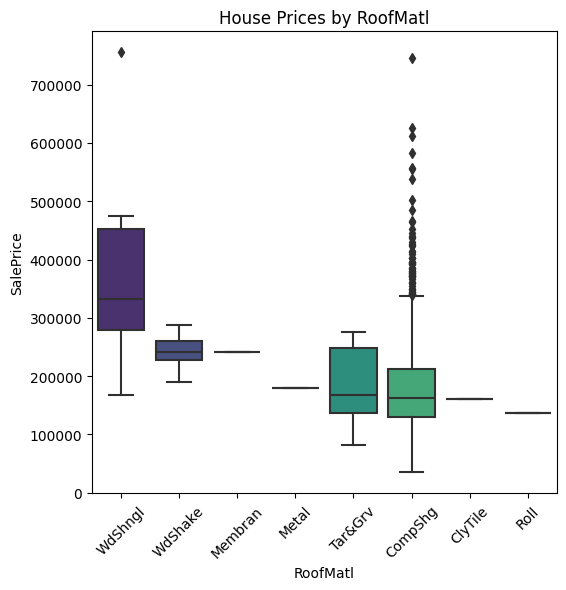

In [34]:
plt.figure(figsize = (6,6))
plt.xticks(rotation=45)
sort_cat("RoofMatl")
title = plt.title("House Prices by RoofMatl")

C:\Users\Matt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


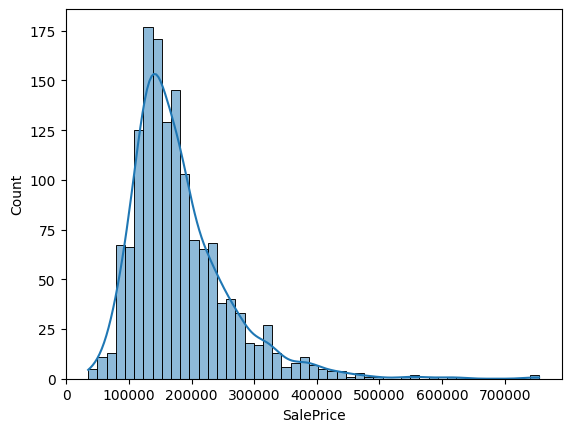

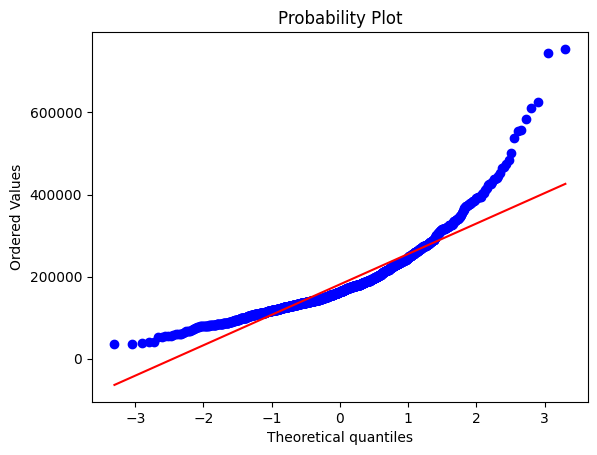

In [35]:
sns.histplot(train["SalePrice"], kde=True)

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [36]:
#skewness and kurtosis
print(f"Skewness: {train['SalePrice'].skew()}")
print(f"Kurtosis: {train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [6]:
y_train = np.log(1 + y_train)

C:\Users\Matt\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


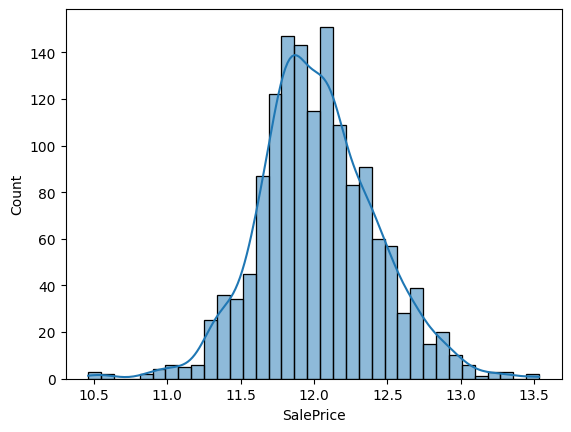

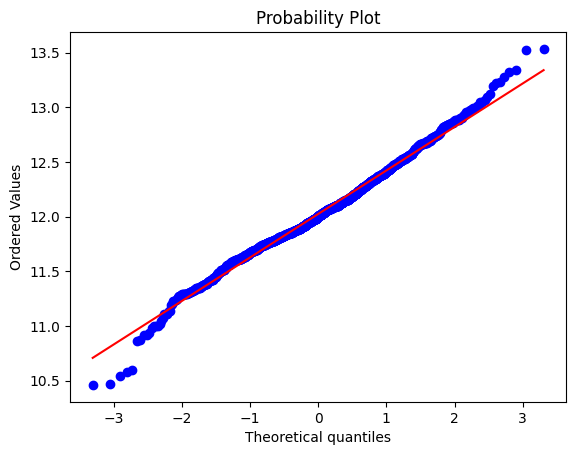

In [38]:
sns.histplot(y_train, kde=True)

fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

In [8]:
skewness = train[numerical_cols].skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64

We are also going to try and fix the skewness of the most skewed numerical variables. 

In [9]:
high_skew = list(skewness[abs(skewness) > 0.75].index)

# Remove 'MSSubClass' and 'SalePrice'
high_skew = [
    col for col in high_skew if col not in ['MSSubClass', 'SalePrice']
]

for col in high_skew:
    X[high_skew] = np.log(1 + X[high_skew])

****Correlation****

C:\Users\Matt\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

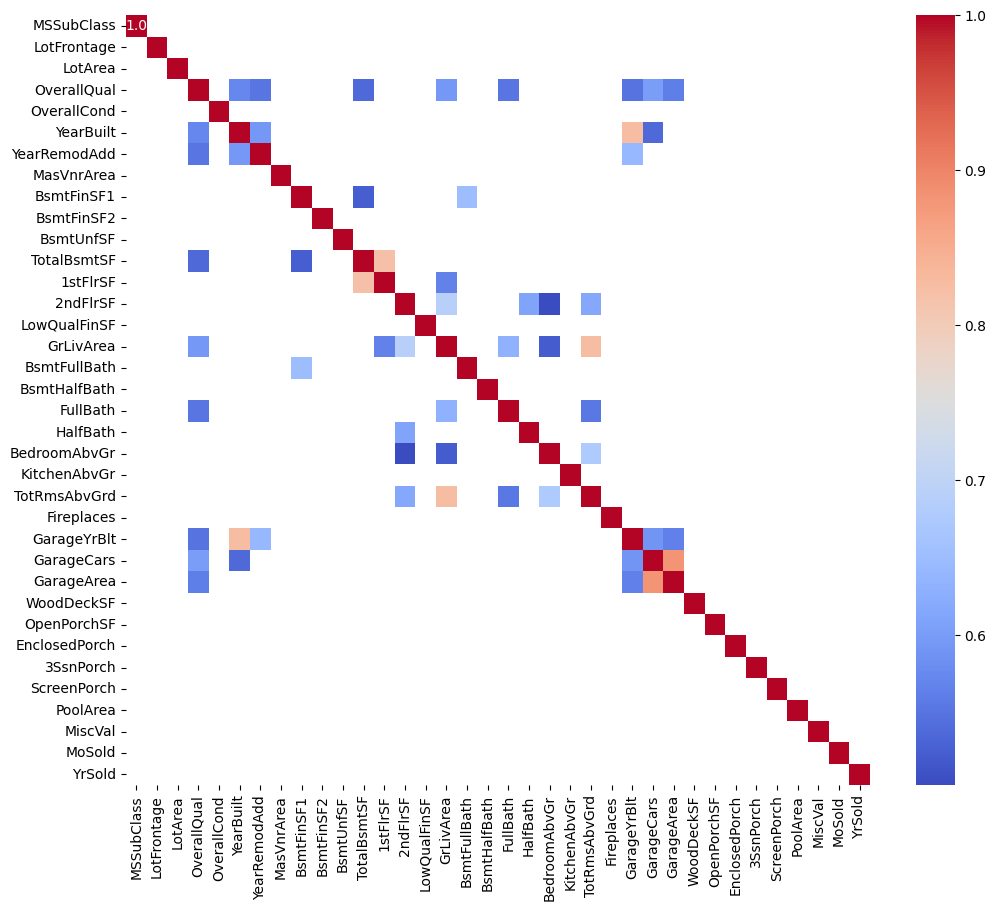

In [43]:
corr_data = train[numerical_cols].iloc[:, :-1].corr()

high_corr = corr_data[abs(corr_data) >= 0.5]

plt.figure(figsize=(12,10))
sns.heatmap(high_corr, cmap='coolwarm', fmt='.1f', annot=True)

In [40]:
## high levels of correllation:

'''
TotRmsAbvGrd/**GrLivArea**
GarageYrBlt/**YearBuilt**
GarageArea/**GarageCars**
1stFlrSF/**TotalBmstSF**
'''

## keep variable with higher correllation, delete the other

first_var = train["1stFlrSF"].corr(train["SalePrice"])
sec_var = train["TotalBsmtSF"].corr(train["SalePrice"])

print(f"the first variable is {first_var} and the second is {sec_var}")

the first variable is 0.6058521846919147 and the second is 0.6135805515591953


In [10]:
X.drop(["TotRmsAbvGrd", "GarageYrBlt", "GarageArea", "1stFlrSF"], axis=1, inplace=True)

## Missing Values 

In [45]:
### find all columns with missing values

X.columns[X.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

Numerical Null: 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea',

Categorical Null: 'Alley', 'Exterior2nd', 'MasVnrTyp', 'BmstQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', GarageCond', 'PoolQC', 'Fence', 'MiscFeature'

Other: 'MSZoning'>>'RL', 'Exterior1st'>>'VinylSide',  'Utilities'>>'AllPub',  'Electrical'>>'SBrKr', 'KitchenQual'>>'TA',  'Functional'>>'Typ', 'SaleType'>>'WD'



In [11]:
# this shows all values where 'MasVnrType' is null and 'MasVnrArea' is not equal to 0, results which don't make sense
# MasVnrArea probably won't be equal to 0

X[(X['MasVnrType'].isnull() & X['MasVnrArea'] != 0)]['MasVnrArea']

Id
625     0.110200
774     0.094181
1231    0.094181
1301    0.110309
1335    0.110250
1670    0.110193
2453    0.094181
2611    0.109949
Name: MasVnrArea, dtype: float64

In [12]:
# all of these nulls didn't make sense because of other column values (null should mean no basement but it was clear a basement existed), 
# all had a value that occured significantly more than any of the others, so the null was replaced with the value that occured the most often. 
X.at[1380, "Electrical"] = "SBrkr"
X.at[625, "MasVnrType"] = "BrkFace"
X.at[1301, "MasVnrType"] = "BrkFace"
X.at[1335, "MasVnrType"] = "BrkFace"
X.at[774, "MasVnrArea"] = 0
X.at[1231, "MasVnrArea"] = 0

# checked to see if there were any null values for MiscFeature where MiscVal wasn't null
# used boxplot to classify MiscFeature based off of price, most likely 'Gar2'
X.at[2550, "MiscFeature"] = 'Gar2'
# there was a garage type, but every other garage value was null, so garage type probably should be null, 
# cars and area both null, changed to 0
X.at[2577, "GarageType"] = np.nan

In [13]:
cat_null = ['Alley', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

num_null = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
            'GarageCars']

other_null = ['MSZoning', 'Exterior1st',  'Utilities',  'Electrical', 'KitchenQual',  'Functional', 'SaleType']

In [14]:
X[cat_null] = X[cat_null].fillna('None')
X[num_null] = X[num_null].fillna(0)

X[other_null] = X[other_null].fillna(X[other_null].mode().iloc[0])

In [15]:
X.columns[X.isnull().any()]

Index([], dtype='object')

# Feature Engineering

## Ideas for Feature Eng

RUNNING WITHOUT F.E. at first

In [72]:
first = train['1stFlrSF'].corr(train['SalePrice'])
second = train['2ndFlrSF'].corr(train['SalePrice'])
train['TotalSF'] = train['1stFlrSF'] + train['2ndFlrSF']
combined = train['TotalSF'].corr(train['SalePrice'])

print(f"1stFlrSF correlation is {first}")
print(f"2ndFlrSF correlation is {second}")
print(f"combined SF correlation is {combined}")

1stFlrSF correlation is 0.6058521846919147
2ndFlrSF correlation is 0.3193338028320677
combined SF correlation is 0.7168830793692813


In [83]:
train['RealTotalSF'] = train['TotalSF'] + train['TotalBasemntSF']
train['LotSF'].corr(train['SalePrice'])

0.782260052797984

## Ordinal Encoding

In [16]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['Utilities', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 
                'PoolQC']

X_ordinal = X[ordinal_cols]
ord_enc = OrdinalEncoder()
X_ord_enc = pd.DataFrame(ord_enc.fit_transform(X[ordinal_cols]), columns=ordinal_cols)
X[ordinal_cols] = X_ord_enc

## Feature Scaling

In [17]:
from sklearn.preprocessing import RobustScaler

numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()

X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

## Get_Dummies

In [18]:
X = pd.get_dummies(X, drop_first=True)
print(X.shape)

(2917, 202)


## Modeling

In [19]:
# need to split data back into train/test splits

test_len = len(test)
X_train_final = X[:-test_len]
X_test_final = X[-test_len:]
y_train_final = y_train


print(f"X_train shape: {X_train_final.shape}")
print(f"X_test shape: {X_test_final.shape}")
print(f"y_train shape: {y_train_final.shape}")

X_train shape: (1458, 202)
X_test shape: (1459, 202)
y_train shape: (1458,)


In [75]:
y_train.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

#### Cross validation/Model Evaluation

In [20]:
from sklearn.model_selection import KFold, cross_val_score

n_folds = 5

def Get_RMSLE(model):

    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)

    rmse = np.exp(np.sqrt(-cross_val_score(model, X_train_final, 
                                           y_train_final, scoring="neg_mean_squared_error", cv=kf)))

    return rmse.mean()

In [ ]:
## above function not returning right format

from sklearn.metrics import mean_squared_log_error

def RMSLE(y_true: np.array, y_pred: np.array

## XGBoost

In [21]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams

In [23]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
Get_RMSLE(model_xgb)

C:\Users\Matt\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:49:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Matt\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:49:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Matt\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:49:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Matt\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [12

1.127908824657481

In [25]:
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone


class AveragingModel(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, y):
        # Create clone models
        self.models_ = [clone(x) for x in self.models]

        # Train cloned models
        for model in self.models_:
            model.fit(X, y)

        return self

    def predict(self, X):
        # Get predictions from trained clone models
        predictions = np.column_stack(
            [model.predict(X) for model in self.models_])

        # Return average predictions
        return np.mean(predictions, axis=1)

In [67]:
arr = [1.01939962, 1.02263007, 1.02166716, 1.01998557, 1.02044401]
np.mean(arr)

1.020825286

## Score Tracking

1. 2/20/24 - Pretty Basic Submission, array([1.12492407, 1.15098216, 1.14404447, 1.11934146, 1.14738312]), 622/3833, top 16.23% on leaderboard
2. 2/21/24 - 2nd Submission

           - Changes:
   
                   - removed GrLivArea outliers
   
                   - went through and double checked logic of when I was working with X_train, X_test, or X.
   
                   -fixed issue where dropped collinear columns from wrong dataframe.
                   - Score: 1.126583172

           - Part 2: 
           - Changes: added skewness/kurtosis information
                   Score: 1.020825286
                   submission score was higher than yesterday?
                   took another pass through
                   Score: 1.1280102564. 2/22/24d


           - Changes

               - adjusted the most skewed columns (1.1259194706772977)

## Submission

In [60]:
my_model = model_xgb
my_model.fit(X_train_final, y_train_final)
predictions = my_model.predict(X_test_final)
final_predictions = np.exp(predictions) - 1
output = pd.DataFrame({'Id':X_test_final.index, 'SalePrice': final_predictions})
output.to_csv('submission2.csv', index=False)

C:\Users\Matt\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [12:30:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
1. Introduction
2. Exploratory Data Analysis (use train unless otherwise mentioned)
    2.1. Sale Price
    2.2. Numerical Features
    2.3. Categorical Features
    2.4. Correlations
    2.5. Missing Values (using X, not train)
3. Data Preprocessing and Feature Engineering
    3.1. Missing Values
    3.2. Outliers
    3.3. Feature Engineering
        3.3.1. Create New variables
        3.3.2. Label Encoding
        3.3.3. Transform Numerical Variables to Categorical Variables
    3.4. Skewness and Normalizing Variables
    3.5. Feature Scaling
    3.6. One-hot Encoding
4. Modeling
    4.1. Regularized Regressions
        4.1.1. Ridge Regression
        4.1.2. Lasso Regression
    4.2. XGBoost
    4.3. LightGBM
    4.4. Averaging model
5. Conclusion
6. Reference